In [1]:
import requests
import nltk
import csv
from bs4 import BeautifulSoup
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
url='https://www.mohfw.gov.in/'
response=requests.get(url)
soup=BeautifulSoup(response.text,parser='html')

stopwords = nltk.corpus.stopwords.words('english')
language_whitelist = ['en']
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for script in soup(["script", "style"]):
    script.extract()
    text = soup.get_text()
    lines = (line.strip() for line in text.splitlines())
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    text = '\n'.join(chunk.lower() for chunk in chunks if chunk)
    filter_text = " ".join(w for w in nltk.word_tokenize(text) \
         if w.lower() in english_vocab)

    tokens = nltk.word_tokenize(filter_text)

    allWordExceptStopDist = nltk.FreqDist(
        w.lower() for w in tokens if w not in stopwords and len(w) >= 3 and w[0])
    
    
    words = [i for i in allWordExceptStopDist]

    if len(words) > 0:
        continue
print(words)



['home', 'latest', 'travel', 'health', 'training', 'material', 'awareness', 'inspirational', 'series', 'service', 'personnel', 'india', 'year', 'towards', 'healthy', 'one', 'screen', 'reader', 'main', 'site', 'ministry', 'family', 'welfare', 'government', 'search', 'number', 'toll', 'free', 'union', 'august', 'ist', 'status', 'change', 'since', 'yesterday', 'active', 'total', 'done', 'previous', 'day', 'technical', 'enquiry', 'respect', 'may', 'kindly', 'extension', 'package', 'insurance', 'fighting', 'period', 'days', 'beyond', 'original', 'preventive', 'contain', 'spread', 'yoga', 'revised', 'international', 'mental', 'talk', 'pandemic', 'tobacco', 'use', 'advisory', 'gated', 'residential', 'click', 'expand', 'name', 'state', 'domestic', 'bus', 'major', 'minor', 'dealing', 'additional', 'standard', 'operating', 'procedure', 'passenger', 'movement', 'post', 'disembarkation', 'traffic', 'land', 'check', 'consolidated', 'march', 'visa', 'bureau', 'immigration', 'meeting', 'high', 'level

In [3]:
#pos tagging
tags=nltk.pos_tag(words)
#tags
print(tags)


[('home', 'NN'), ('latest', 'JJS'), ('travel', 'NN'), ('health', 'NN'), ('training', 'VBG'), ('material', 'NN'), ('awareness', 'NN'), ('inspirational', 'JJ'), ('series', 'NN'), ('service', 'NN'), ('personnel', 'NNS'), ('india', 'VBP'), ('year', 'NN'), ('towards', 'NNS'), ('healthy', 'JJ'), ('one', 'CD'), ('screen', 'NN'), ('reader', 'NN'), ('main', 'JJ'), ('site', 'NN'), ('ministry', 'NN'), ('family', 'NN'), ('welfare', 'NN'), ('government', 'NN'), ('search', 'NN'), ('number', 'NN'), ('toll', 'NN'), ('free', 'JJ'), ('union', 'NN'), ('august', 'NN'), ('ist', 'NN'), ('status', 'NN'), ('change', 'NN'), ('since', 'IN'), ('yesterday', 'NN'), ('active', 'JJ'), ('total', 'NN'), ('done', 'VBN'), ('previous', 'JJ'), ('day', 'NN'), ('technical', 'JJ'), ('enquiry', 'NN'), ('respect', 'NN'), ('may', 'MD'), ('kindly', 'VB'), ('extension', 'NN'), ('package', 'NN'), ('insurance', 'NN'), ('fighting', 'VBG'), ('period', 'NN'), ('days', 'NNS'), ('beyond', 'IN'), ('original', 'JJ'), ('preventive', 'JJ'),

In [4]:
my_dict=dict(tags)
print(my_dict)

{'home': 'NN', 'latest': 'JJS', 'travel': 'NN', 'health': 'NN', 'training': 'VBG', 'material': 'NN', 'awareness': 'NN', 'inspirational': 'JJ', 'series': 'NN', 'service': 'NN', 'personnel': 'NNS', 'india': 'VBP', 'year': 'NN', 'towards': 'NNS', 'healthy': 'JJ', 'one': 'CD', 'screen': 'NN', 'reader': 'NN', 'main': 'JJ', 'site': 'NN', 'ministry': 'NN', 'family': 'NN', 'welfare': 'NN', 'government': 'NN', 'search': 'NN', 'number': 'NN', 'toll': 'NN', 'free': 'JJ', 'union': 'NN', 'august': 'NN', 'ist': 'NN', 'status': 'NN', 'change': 'NN', 'since': 'IN', 'yesterday': 'NN', 'active': 'JJ', 'total': 'NN', 'done': 'VBN', 'previous': 'JJ', 'day': 'NN', 'technical': 'JJ', 'enquiry': 'NN', 'respect': 'NN', 'may': 'MD', 'kindly': 'VB', 'extension': 'NN', 'package': 'NN', 'insurance': 'NN', 'fighting': 'VBG', 'period': 'NN', 'days': 'NNS', 'beyond': 'IN', 'original': 'JJ', 'preventive': 'JJ', 'contain': 'NN', 'spread': 'NN', 'yoga': 'NN', 'revised': 'VBD', 'international': 'JJ', 'mental': 'JJ', 'ta

In [5]:
noun_words_list=[]
#print(type(a))
for i in my_dict:
      if my_dict[i] == 'NN':
            #print(i)
            noun_words_list.append(i)
            #print(a)
     

In [6]:
print(noun_words_list,len(noun_words_list))


['home', 'travel', 'health', 'material', 'awareness', 'series', 'service', 'year', 'screen', 'reader', 'site', 'ministry', 'family', 'welfare', 'government', 'search', 'number', 'toll', 'union', 'august', 'ist', 'status', 'change', 'yesterday', 'total', 'day', 'enquiry', 'respect', 'extension', 'package', 'insurance', 'period', 'contain', 'spread', 'yoga', 'talk', 'tobacco', 'use', 'click', 'expand', 'name', 'state', 'bus', 'standard', 'procedure', 'passenger', 'movement', 'post', 'disembarkation', 'traffic', 'land', 'check', 'visa', 'bureau', 'immigration', 'meeting', 'level', 'group', 'prevention', 'management', 'sop', 'cruise', 'isolation', 'care', 'support', 'department', 'institute', 'psychosocial', 'audio', 'stigma', 'video', 'stress', 'meditation', 'stop', 'drinking', 'depression', 'take', 'stay', 'manage', 'facility', 'resident', 'rate', 'test', 'attendance', 'worship', 'shopping', 'hospitality', 'workplace', 'strategy', 'discharge', 'policy', 'quarantine', 'disinfectant', 'bid

In [7]:
noun_words_set=set(noun_words_list)
print(noun_words_set,len(noun_words_set))

{'standard', 'house', 'schedule', 'material', 'immunity', 'place', 'promotion', 'security', 'body', 'family', 'bureau', 'meditation', 'exemption', 'role', 'pertaining', 'transfusion', 'status', 'mask', 'light', 'allocation', 'develop', 'malayalam', 'eye', 'depression', 'group', 'guide', 'worker', 'homemade', 'spread', 'discriminate', 'order', 'name', 'delivery', 'blood', 'scheme', 'antigen', 'plan', 'market', 'address', 'stress', 'discharge', 'staff', 'toll', 'yesterday', 'enquiry', 'sanction', 'bank', 'template', 'change', 'traffic', 'room', 'land', 'bengali', 'package', 'epidemiology', 'book', 'sop', 'expand', 'movement', 'strategy', 'control', 'government', 'mark', 'procurement', 'battle', 'population', 'virus', 'medicine', 'antibody', 'wise', 'wear', 'crisis', 'safety', 'case', 'infection', 'mock', 'health', 'number', 'insurance', 'psychosocial', 'login', 'hospital', 'facility', 'nation', 'contain', 'disembarkation', 'hospitality', 'donation', 'court', 'transmission', 'master', 've

house
management
medicine
community
union
place
welfare
medicine
design
take
guide
stress
safety
note
hygiene
research
state
role
education
strategy
information
insurance
homemade
hygiene
family
water
insurance
['Home', 'Business', 'Health', 'Society', 'Recreation', 'Home', 'Health', 'Science', 'Arts', 'Recreation', 'Reference', 'Health', 'Health', 'Reference', 'Health', 'Health', 'Politics', 'Society', 'Health', 'Games', 'Computers', 'Health', 'Home', 'Science', 'Health', 'Health', 'Business']
Counter({'Health': 10, 'Home': 3, 'Business': 2, 'Society': 2, 'Recreation': 2, 'Science': 2, 'Reference': 2, 'Arts': 1, 'Politics': 1, 'Games': 1, 'Computers': 1})

Maximum number of words are from category : Health
Hence the text given belongs to category : Health


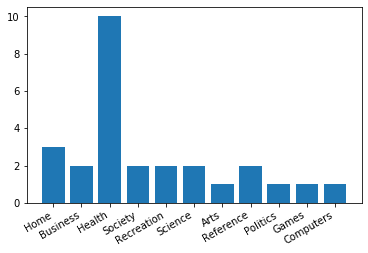

maximum no of word are from category : Health


In [8]:
import csv
#plt=pd.read_csv('words.csv')
#plt.head

new_list=[]
with open('words.csv','r') as abc:
    new_dict=csv.DictReader(abc)
    print(new_dict)
    for row in new_dict:
        result=dict(row)
        #print(result)
        for key,value in result.items():
             if value in noun_words_list:
                    print(value)
                    new_list.append(key)
print(new_list)

final_words=Counter(new_list)
print(final_words)

v=list(final_words.values())
k=list(final_words.keys())
print()
print("Maximum number of words are from category :", k[v.index(max(v))] )
print("Hence the text given belongs to category :", k[v.index(max(v))] ) 



fig, ax1 = plt.subplots()
ax1.bar(final_words.keys(), final_words.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()   
print("maximum no of word are from category :", k[v.index(max(v))] ) 


In [9]:
import csv
new_list=[]
extract_words=[]
with open('words.csv','r') as abc:
    new_dict=csv.DictReader(abc)
    print(new_dict)
    for row in new_dict:
        result=dict(row)
        #print (result)
        for key,value in result.items():
            if value in noun_words_list:
                #print(value)
                extract_words.append(value)
    print(len(extract_words))
    print(extract_words)

27
['house', 'management', 'medicine', 'community', 'union', 'place', 'welfare', 'medicine', 'design', 'take', 'guide', 'stress', 'safety', 'note', 'hygiene', 'research', 'state', 'role', 'education', 'strategy', 'information', 'insurance', 'homemade', 'hygiene', 'family', 'water', 'insurance']


In [10]:
print(extract_words)

['house', 'management', 'medicine', 'community', 'union', 'place', 'welfare', 'medicine', 'design', 'take', 'guide', 'stress', 'safety', 'note', 'hygiene', 'research', 'state', 'role', 'education', 'strategy', 'information', 'insurance', 'homemade', 'hygiene', 'family', 'water', 'insurance']


In [11]:
import pandas as pd
df=pd.read_csv('w1.csv')
df

,Words,Labels1
0,disease,Health & Science
1,obesity,Health & Science
2,who,Health & Science
3,medicine,Health & Science
4,nutrition,Health & Science
...,...,...
496,reveal,Politics & Society
497,pac,Politics & Society
498,nepotism,Politics & Society
499,liberty,Politics & Society


In [12]:
print(df.info())
print(df.size)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
Words      501 non-null object
Labels1    501 non-null object
dtypes: object(2)
memory usage: 8.0+ KB
None
1002
(501, 2)


In [13]:
#Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Labeled_Data'] = label_encoder.fit_transform(df['Labels1'])
df

,Words,Labels1,Labeled_Data
0,disease,Health & Science,3
1,obesity,Health & Science,3
2,who,Health & Science,3
3,medicine,Health & Science,3
4,nutrition,Health & Science,3
...,...,...,...
496,reveal,Politics & Society,4
497,pac,Politics & Society,4
498,nepotism,Politics & Society,4
499,liberty,Politics & Society,4


In [14]:
x=df['Words']
y=df['Labeled_Data']


In [15]:
#Features
from sklearn.feature_extraction.text import CountVectorizer  
cv=CountVectorizer(max_features=500)
cv.fit(x)
X= cv.fit_transform(x)
print(X.shape)
print(type(X))
X

(501, 499)
<class 'scipy.sparse.csr.csr_matrix'>


<501x499 sparse matrix of type '<class 'numpy.int64'>'
	with 543 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)

print(x.size,type(X))
print(y.size,type(y))


(350, 499)
(350,)
501 <class 'scipy.sparse.csr.csr_matrix'>
501 <class 'pandas.core.series.Series'>


In [17]:
from sklearn.svm import SVC
classifier=SVC(kernel='poly',degree=1,random_state=42)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [18]:
y_pred=classifier.predict(x_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print("Correctly predicted & wrongly predicted",confusion_m) #27 entries wrongly predicted 1088 entries correctly predicted.

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

[0 0 0 0 0 0 0 4 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 4
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 1 0 0 4 0 4 0 0 0 0 4 0 0 0 0 0 4 0 0
 0 0 0]
Correctly predicted & wrongly predicted [[21  0  1  1  1]
 [30  1  0  0  0]
 [23  0  1  0  0]
 [33  3  0  3  0]
 [25  0  0  0  8]]
Accuracy 0.2251655629139073


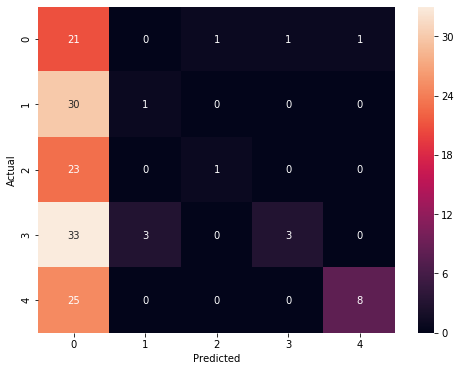

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_m, annot=True,color='b')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [20]:
print(classifier.predict(cv.transform(extract_words)))

[0 0 3 4 0 0 3 3 0 0 0 3 0 0 0 3 4 4 1 0 0 0 0 0 3 0 0]


In [21]:
df[df['Words'] =='medicine']

,Words,Labels1,Labeled_Data
3,medicine,Health & Science,3
20,medicine,Health & Science,3


In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Labels1'].unique()))

                        precision    recall  f1-score   support

      Health & Science       0.16      0.88      0.27        24
Education & Technology       0.25      0.03      0.06        31
                 Games       0.50      0.04      0.08        24
    Politics & Society       0.75      0.08      0.14        39
              Business       0.89      0.24      0.38        33

              accuracy                           0.23       151
             macro avg       0.51      0.25      0.18       151
          weighted avg       0.54      0.23      0.19       151



from IPython.display import display
for predicted in df.Labeled_Data:
    for actual in df.Labeled_Data:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format([actual],[predicted], conf_mat[actual, predicted]))
            display(df.loc[[(y_test == actual) & (y_pred == predicted)]][['Labeled_Data', 'Words']])